<h1> Data Cleaning </h1>
<b> Note: </b>The data below are not valid this is for practice purposes

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\\customer_transactions.csv')
df 

,Transaction_ID,Customer_Name,Purchase_Date,Amount_Spent,Payment_Method,Customer_Age
0,1001,Grace,2023-01-01,120.25,Venmo,NaN
1,1002,David,08/25/2023,500.30,Credit,34.0
2,1003,Henry,04-10-2023,75.50,Venmo,50.0
3,1004,Eve,04-10-2023,85.00,debit,38.0
4,1005,Grace,2023.05.12,NaN,Credit Card,34.0
...,...,...,...,...,...,...
995,1996,NaN,"March 5, 2023",99999.99,Credit,25.0
996,1997,NaN,2023-07-20,320.75,paypal,30.0
997,1998,Henry,2023.05.12,100.00,PayPal,45.0
998,1999,Bob,2023/02/15,60.00,PayPal,50.0


In [146]:
df.isnull().sum()

Transaction_ID      0
Customer_Name     107
Purchase_Date       0
Amount_Spent       86
Payment_Method      0
Customer_Age       88
dtype: int64

In [147]:
df.Customer_Name = df["Customer_Name"].fillna('Unknown')

In [148]:
df.head(10)

,Transaction_ID,Customer_Name,Purchase_Date,Amount_Spent,Payment_Method,Customer_Age
0,1001,Grace,2023-01-01,120.25,Venmo,NaN
1,1002,David,08/25/2023,500.30,Credit,34.0
2,1003,Henry,04-10-2023,75.50,Venmo,50.0
3,1004,Eve,04-10-2023,85.00,debit,38.0
4,1005,Grace,2023.05.12,NaN,Credit Card,34.0
5,1006,Unknown,08/25/2023,60.00,crypto,40.0
6,1007,charlie,2023.05.12,75.50,debit,29.0
7,1008,Grace,08/25/2023,99999.99,crypto,50.0
8,1009,Henry,2023-10-10,100.00,crypto,-5.0
9,1010,Eve,2023-01-01,250.50,Cash,200.0


In [149]:
df.isnull().sum()

Transaction_ID     0
Customer_Name      0
Purchase_Date      0
Amount_Spent      86
Payment_Method     0
Customer_Age      88
dtype: int64

In [150]:
df["Amount_Spent"].describe()

count      914.000000
mean     10876.399475
std      30903.202222
min        -50.000000
25%         75.500000
50%        120.250000
75%        320.750000
max      99999.990000
Name: Amount_Spent, dtype: float64

In [151]:
#if the missing values is less than 10-15%  get the mean/meadian 
null_count = df["Amount_Spent"].isnull().sum()
as_count = len(df["Amount_Spent"])

#get the percentage
percentage = (null_count / as_count) * 100 

print(percentage)

8.6


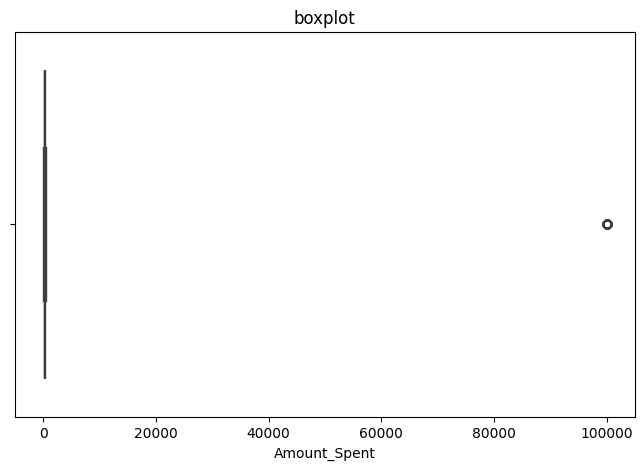

In [152]:
#Since less than 10% we have to know if we will be using mean or median
#we will be using median if their are outliers
#we will be using the mean if there are no outliers
#To know the median there are two ways, first is visualizing it using box plot

#Box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.boxplot(x=df["Amount_Spent"])
plt.title('boxplot')
plt.show()

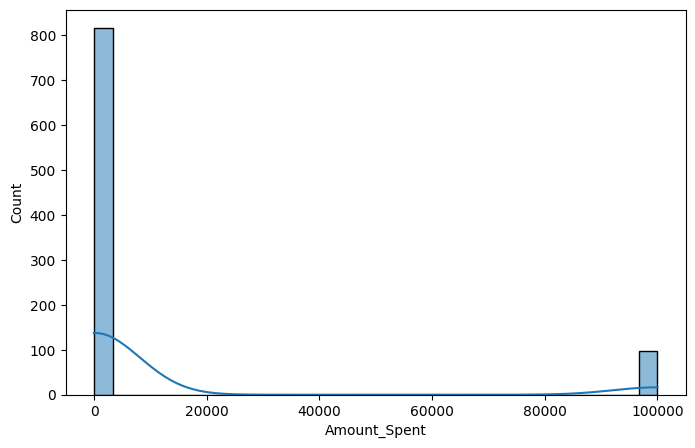

In [153]:
plt.figure(figsize=(8,5))
sns.histplot(df["Amount_Spent"], bins = 30, kde = True)
plt.show()

In [154]:
as_median = df["Amount_Spent"].median()

print(as_median)

120.25


In [155]:
df["Amount_Spent"] = df['Amount_Spent'].fillna(as_median)

In [156]:
df['Amount_Spent'].isnull().sum()

0

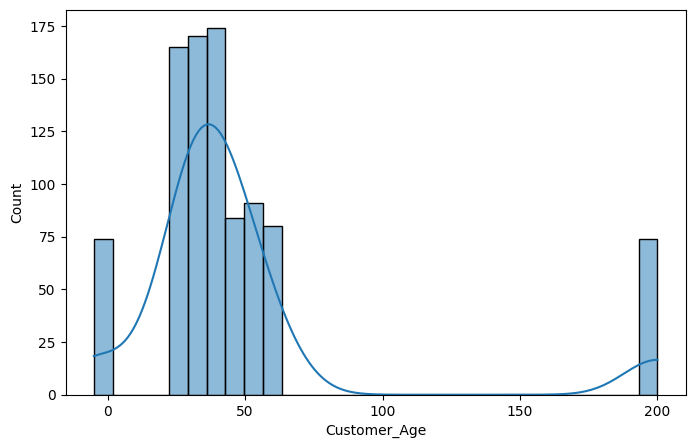

In [157]:
plt.figure(figsize = (8,5))
sns.histplot(df['Customer_Age'], bins = 30, kde = True)
plt.show()


In [158]:
age_median = df['Customer_Age'].median()
print(age_median)

38.0


In [159]:
df["Customer_Age"] = df["Customer_Age"].fillna(age_median)

df = df.infer_objects()

In [160]:
df["Customer_Age"].isnull().sum()

0

In [161]:
df['Customer_Age']

0      38.0
1      34.0
2      50.0
3      38.0
4      34.0
       ... 
995    25.0
996    30.0
997    45.0
998    50.0
999    -5.0
Name: Customer_Age, Length: 1000, dtype: float64

In [162]:
#Asses Negative values
negs_amount_spent = df[df["Customer_Age"] < 0 ]

negs_amount_spent.isnull().sum()

Transaction_ID    0
Customer_Name     0
Purchase_Date     0
Amount_Spent      0
Payment_Method    0
Customer_Age      0
dtype: int64

In [163]:
df['Amount_Spent']

0        120.25
1        500.30
2         75.50
3         85.00
4        120.25
         ...   
995    99999.99
996      320.75
997      100.00
998       60.00
999       75.50
Name: Amount_Spent, Length: 1000, dtype: float64

In [164]:
# Count negative values in the 'Amount_Spent' column
negative_amount_spent = (df['Amount_Spent'] < 0).sum()
print(negative_amount_spent)

85


In [165]:
df['Amount_Spent'] = df['Amount_Spent'].apply(lambda x: x if x >= 0 else np.nan)

In [166]:
df['Amount_Spent'].isnull().sum()

85

In [167]:
df['Amount_Spent'] = df['Amount_Spent'].fillna(as_median)

In [168]:
df['Amount_Spent'].isnull().sum()

0

In [169]:
negs_customer_age = (df['Customer_Age'] < 0 ).sum()
print(negs_customer_age)

74


In [170]:
df['Customer_Age'] = df['Customer_Age'].apply(lambda x : x if x >= 0 else np.nan)

In [171]:
df['Customer_Age'].isnull().sum()

74

In [172]:
df['Customer_Age'] = df['Customer_Age'].fillna(age_median)

In [174]:
df['Customer_Age'].isnull().sum()

0

In [176]:
df.isnull().sum()

Transaction_ID    0
Customer_Name     0
Purchase_Date     0
Amount_Spent      0
Payment_Method    0
Customer_Age      0
dtype: int64